In [1]:
# IMPORTING FUTURE
import numpy as np
import pandas as pd
import seaborn
import librosa
import librosa.display
import IPython.display as ipd
%matplotlib inline
import matplotlib.pyplot as plt
#FILTER WARNINGS
import warnings
warnings.filterwarnings('ignore')

In [12]:
PATH = 'external_media/'
FILE = 'snow.wav'
y, sr = librosa.load(PATH+FILE, mono=True, duration=15)
ipd.Audio(y, rate=sr)

In [16]:
h, p = librosa.effects.hpss(y)

In [18]:
ipd.Audio(h, rate=sr)

In [19]:
ipd.Audio(p, rate=sr)

In [21]:
print(len(h), len(p))

330750 330750


### COMBINE TWO SIGNALS AND RESCALE

In [28]:
x = h/h.max() + p/p.max()
x.max()

1.2941153

In [29]:
ipd.Audio(x, rate=sr)

In [30]:
x = 0.5 * x/x.max()
x.max()

0.5

In [31]:
ipd.Audio(x, rate=sr)

### COMPUTE STFT (SHORT-TIME FOURIER TRANSFORM)

In [32]:
X = librosa.stft(x)

In [33]:
Xmag = librosa.amplitude_to_db(X)

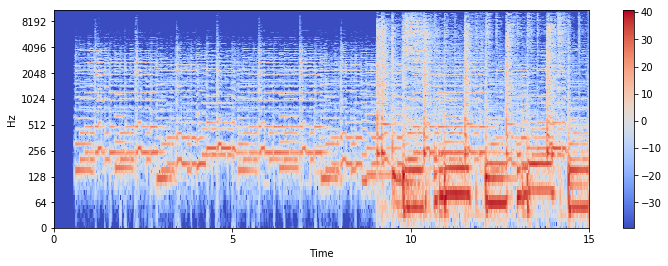

In [35]:
plt.figure(figsize=(12,4))
librosa.display.specshow(Xmag, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [36]:
H, P = librosa.decompose.hpss(X)

In [37]:
Hmag = librosa.amplitude_to_db(H)
Pmag = librosa.amplitude_to_db(P)

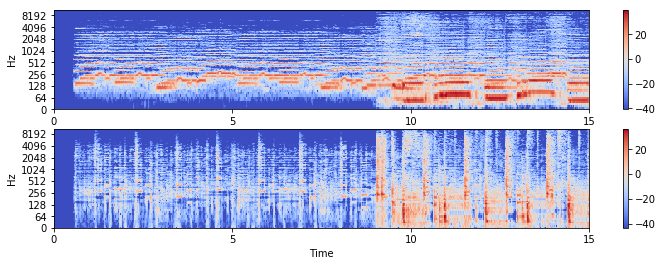

In [39]:
plt.figure(figsize=(12,4))
plt.subplot(2,1,1)
librosa.display.specshow(Hmag, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

plt.subplot(2,1,2)
librosa.display.specshow(Pmag, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()


In [42]:
h = librosa.istft(H)
ipd.Audio(h, rate=sr)

In [44]:
p = librosa.istft(P)
ipd.Audio(p, rate=sr)